In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기

(66281, 4)

In [2]:
act


,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58
...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136
66277,2022-01-31 23:28:41.683,-89,145,138
66278,2022-01-31 23:28:49.383,-93,138,137
66279,2022-01-31 23:32:36.426,-93,131,137


In [87]:
#거리 및 속도 산출을 위해, 직전에 감지된 좌표값열을 추가함
# shift(1)로 timestamp열값이 하나씩 아래로 이동된다.
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [88]:
# NaN 값이 있는 행을 삭제하자. NaN가 있으면 거리 및 속도 계산할 수 없다.
act2 = act.dropna()
act2.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [145]:
# 직전 좌표값으로 두 지점간의 거리를 산출한 다음, 산출된 값을 dist 열에 추가한다.
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
    
    
cleaned = act2.copy()
cleaned.loc[:,'dist'] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)
cleaned.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111


In [144]:
# 직전 좌표값으로 두 지점간의 거리를 산출한 다음, 산출된 값을 dist 열에 추가한다.
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
    
    
cleaned = act2.copy()
cleaned.loc[:,['dist']] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)
cleaned.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111


In [149]:
cleaned

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901
...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043


In [93]:
#시간 차분을 구한 다음, d_time 열에 저장한다.

from datetime import datetime

def calc_timediff(df):
    d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()
    
cleaned['d_time'] = cleaned[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [146]:
#시간 차분을 구한 다음, d_time 열에 저장한다.

from datetime import datetime

def calc_timediff(df):
    d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()
    
cleaned.loc[:, 'd_time'] = cleaned.loc[:, ["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [148]:
"""
cleaned[["timestamp", "p_timestamp"]]는 cleaned.loc[:, ["timestamp", "p_timestamp"]]와 동일한 의미이다.
cleaned.loc[:, ["timestamp", "p_timestamp"]]는 cleaned DataFrame에서 timestamp열과 p_timestamp열의 모든 행을 뜻한다.
"""
cleaned.loc[:, ["timestamp", "p_timestamp"]]

,timestamp,p_timestamp
1,2022-01-01 00:01:42.961,2022-01-01 00:01:40.363
2,2022-01-01 00:01:45.562,2022-01-01 00:01:42.961
3,2022-01-01 00:01:48.163,2022-01-01 00:01:45.562
4,2022-01-01 00:02:08.864,2022-01-01 00:01:48.163
5,2022-01-01 00:02:21.765,2022-01-01 00:02:08.864
...,...,...
66276,2022-01-31 23:28:00.481,2022-01-31 23:27:55.381
66277,2022-01-31 23:28:41.683,2022-01-31 23:28:00.481
66278,2022-01-31 23:28:49.383,2022-01-31 23:28:41.683
66279,2022-01-31 23:32:36.426,2022-01-31 23:28:49.383


In [172]:
"""
속도를 구한 다음, activity 열에 저장한다.
"""

def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        # 정상적인 수가 아님.
        return 0


cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(calc_act, axis=1)
cleaned.head(5)    

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,2734938,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,2734938,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,2734938,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,2734938,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,2734938,2734938,0.980475


<AxesSubplot: >

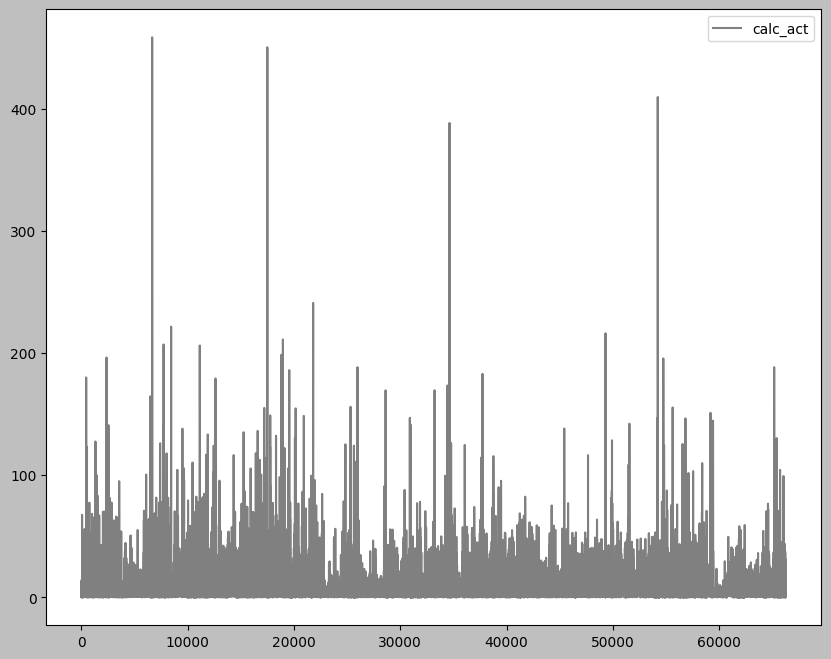

In [96]:
cleaned.plot(y="calc_act", c="0.5")

In [151]:
cleaned['timestamp']

1        2022-01-01 00:01:42.961
2        2022-01-01 00:01:45.562
3        2022-01-01 00:01:48.163
4        2022-01-01 00:02:08.864
5        2022-01-01 00:02:21.765
                  ...           
66276    2022-01-31 23:28:00.481
66277    2022-01-31 23:28:41.683
66278    2022-01-31 23:28:49.383
66279    2022-01-31 23:32:36.426
66280    2022-01-31 23:32:44.126
Name: timestamp, Length: 66280, dtype: object

In [161]:
# 좀 알아보기 어렵다.
# 그렇다면, 10분 간격으로 활동지수를 산출해 보자.

# https://www.unixtimestamp.com/ 에서 unix time이 맞는지 확인 가능

# unix time의 단위는 초이다. 10분 간격으로 하려면 unix time를 600초 나눈 몫을 각 열에 추가한다.
# 600초로 나눈 몫 값이 같은, 행들의 평균과 최소, 최대값을 구해보자.

from datetime import datetime
import time

# 시간정보 문자열을 정수 자료형 unix time으로 변환후, 10분단위로 절삭하는 함수
def make_unixtime(ts):
    print(ts)
    temp = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)
   
cleaned['utime'] = cleaned['timestamp'].apply(make_unixtime)
cleaned.head(5)


2022-01-01 00:01:42.961
2022-01-01 00:01:45.562
2022-01-01 00:01:48.163
2022-01-01 00:02:08.864
2022-01-01 00:02:21.765
2022-01-01 00:02:32.092
2022-01-01 00:02:37.297
2022-01-01 00:03:10.795
2022-01-01 00:03:31.301
2022-01-01 00:03:41.495
2022-01-01 00:03:43.995
2022-01-01 00:04:30.098
2022-01-01 00:04:45.699
2022-01-01 00:04:56.099
2022-01-01 00:05:01.305
2022-01-01 00:05:14.100
2022-01-01 00:05:32.202
2022-01-01 00:06:13.502
2022-01-01 00:06:16.104
2022-01-01 00:06:34.105
2022-01-01 00:13:23.327
2022-01-01 00:15:29.232
2022-01-01 00:19:15.346
2022-01-01 00:19:17.948
2022-01-01 00:19:20.545
2022-01-01 00:19:23.146
2022-01-01 00:19:54.052
2022-01-01 00:19:56.651
2022-01-01 00:19:59.250
2022-01-01 00:20:22.451
2022-01-01 00:20:30.109
2022-01-01 00:20:40.348
2022-01-01 00:24:16.461
2022-01-01 00:24:52.362
2022-01-01 00:39:28.609
2022-01-01 00:53:52.456
2022-01-01 00:56:53.163
2022-01-01 00:56:55.763
2022-01-01 00:56:58.264
2022-01-01 00:57:00.864
2022-01-01 00:57:03.464
2022-01-01 01:17

2022-01-12 11:27:53.235
2022-01-12 11:27:55.736
2022-01-12 11:27:58.336
2022-01-12 11:28:00.836
2022-01-12 11:28:03.437
2022-01-12 11:28:06.036
2022-01-12 11:28:08.642
2022-01-12 11:28:11.237
2022-01-12 11:28:13.738
2022-01-12 11:28:16.336
2022-01-12 11:28:18.939
2022-01-12 11:28:21.537
2022-01-12 11:28:29.237
2022-01-12 11:28:31.738
2022-01-12 11:28:34.337
2022-01-12 11:28:36.938
2022-01-12 11:28:39.438
2022-01-12 11:28:42.037
2022-01-12 11:28:44.643
2022-01-12 11:28:52.338
2022-01-12 11:29:04.241
2022-01-12 11:29:06.838
2022-01-12 11:29:09.339
2022-01-12 11:29:48.647
2022-01-12 11:29:51.241
2022-01-12 11:29:53.743
2022-01-12 11:29:58.841
2022-01-12 11:30:01.443
2022-01-12 11:30:03.945
2022-01-12 11:30:06.542
2022-01-12 11:30:09.143
2022-01-12 11:30:11.743
2022-01-12 11:30:14.342
2022-01-12 11:30:16.944
2022-01-12 11:30:19.545
2022-01-12 11:30:24.744
2022-01-12 11:30:27.343
2022-01-12 11:30:29.944
2022-01-12 11:30:32.544
2022-01-12 11:30:35.045
2022-01-12 11:30:37.649
2022-01-12 11:30

2022-01-21 00:07:35.349
2022-01-21 00:07:40.449
2022-01-21 00:07:43.055
2022-01-21 00:07:50.749
2022-01-21 00:07:53.250
2022-01-21 00:08:26.552
2022-01-21 00:08:31.652
2022-01-21 00:08:34.252
2022-01-21 00:08:41.853
2022-01-21 00:09:15.254
2022-01-21 00:09:20.454
2022-01-21 00:09:38.556
2022-01-21 00:09:48.856
2022-01-21 00:09:53.955
2022-01-21 00:09:56.556
2022-01-21 00:10:01.657
2022-01-21 00:10:04.158
2022-01-21 00:10:06.757
2022-01-21 00:10:09.258
2022-01-21 00:10:11.857
2022-01-21 00:10:24.858
2022-01-21 00:10:30.064
2022-01-21 00:10:42.759
2022-01-21 00:10:59.459
2022-01-21 00:11:01.960
2022-01-21 00:11:04.561
2022-01-21 00:11:07.161
2022-01-21 00:11:35.461
2022-01-21 00:11:37.962
2022-01-21 00:11:40.561
2022-01-21 00:11:48.261
2022-01-21 00:12:02.565
2022-01-21 00:12:07.662
2022-01-21 00:12:12.664
2022-01-21 00:12:17.763
2022-01-21 00:12:25.464
2022-01-21 00:12:30.565
2022-01-21 00:12:45.965
2022-01-21 00:12:48.565
2022-01-21 00:12:58.866
2022-01-21 00:13:01.366
2022-01-21 00:13

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,2734938,2734938
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,2734938,2734938
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,2734938,2734938
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,2734938,2734938
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,2734938,2734938


In [173]:
# 좀 알아보기 어렵다.
# 그렇다면, 10분 간격으로 활동지수를 산출해 보자.

# https://www.unixtimestamp.com/ 에서 unix time이 맞는지 확인 가능

# unix time의 단위는 초이다. 10분 간격으로 하려면 unix time를 600초 나눈 몫을 각 열에 추가한다.
# 600초로 나눈 몫 값이 같은, 행들의 평균과 최소, 최대값을 구해보자.

from datetime import datetime
import time

# 시간정보 문자열을 정수 자료형 unix time으로 변환후, 10분단위로 절삭하는 함수
def make_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)
   
cleaned['utime2'] = cleaned[['timestamp']].apply(make_unixtime, axis=1)
cleaned.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,2734938,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,2734938,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,2734938,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,2734938,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,2734938,2734938,0.980475


In [97]:
print(type('2022-01-01 00:01:42.961	'))

<class 'str'>


In [98]:
print(len('2022-01-01 00:01:42.961'))

24


In [115]:
import sys

#파이썬에서는 자료형에 맞는 클래스를 부여하는 방식으로 자료형 변수를 가진다.

print(sys.getsizeof('2022-01-01 00:01:42.961'))
print(sys.getsizeof(datetime.strptime('2022-01-01 00:01:42.961', "%Y-%m-%d %H:%M:%S.%f")))
print(sys.getsizeof(2734938))
print(sys.getsizeof(2734938.1))
print(sys.getsizeof(12))

print(type('2022-01-01 00:01:42.961'))
print(type(datetime.strptime('2022-01-01 00:01:42.961', "%Y-%m-%d %H:%M:%S.%f")))
print(type(2734938))
print(type(2734938.1))
print(type(12))


72
48
28
24
28
<class 'str'>
<class 'datetime.datetime'>
<class 'int'>
<class 'float'>
<class 'int'>


72


In [168]:
cleaned.groupby('utime')['calc_act'].mean().head(100)
### dont

KeyError: 'Column not found: calc_act'

In [60]:
s_grouped = cleaned3.groupby('utime')['calc_act']
s_grouped.max()
#dont


utime
2734938.0     9.146772
2734939.0    12.985407
2734940.0     3.200697
2734941.0     0.065608
2734943.0    14.338601
               ...    
2739394.0    20.857873
2739395.0    16.061886
2739397.0    31.025631
2739398.0    23.493043
2739399.0     0.389610
Name: calc_act, Length: 2363, dtype: float64

In [169]:
cleaned4 = cleaned.loc[:, ['utime', 'calc_act']]
cleaned4
#dont

KeyError: "['calc_act'] not in index"

In [170]:
grouped = cleaned.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
grouped_calc_act.agg('mean')
#dont

KeyError: 'Column not found: calc_act'

In [174]:
gp = cleaned['calc_act'].groupby(cleaned['utime'])

result = pd.DataFrame()
result['mean'] = gp.mean()
result['min'] = gp.min()
result['max'] = gp.max()

result

# grouped = cleaned.groupby(['utime'])
# grouped.head(10)

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [175]:
result.describe()

,mean,min,max
count,2363.000000,2363.000000,2363.000000
mean,7.706165,0.265219,31.111548
std,6.838683,0.685761,34.790031
min,0.001043,0.000000,0.001043
25%,2.188362,0.043078,7.275794
50%,7.058560,0.127554,26.054676
75%,11.246453,0.299810,42.241444
max,93.167257,13.350381,458.448986


In [176]:
grouped = cleaned.groupby(['utime'])
result = grouped['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [177]:
grouped = cleaned.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [95]:
#result.drop(['utime'], axis=1)
#result['utime'] = result['utime'].apply(np.init64)
#result['utime']



<AxesSubplot: xlabel='utime'>

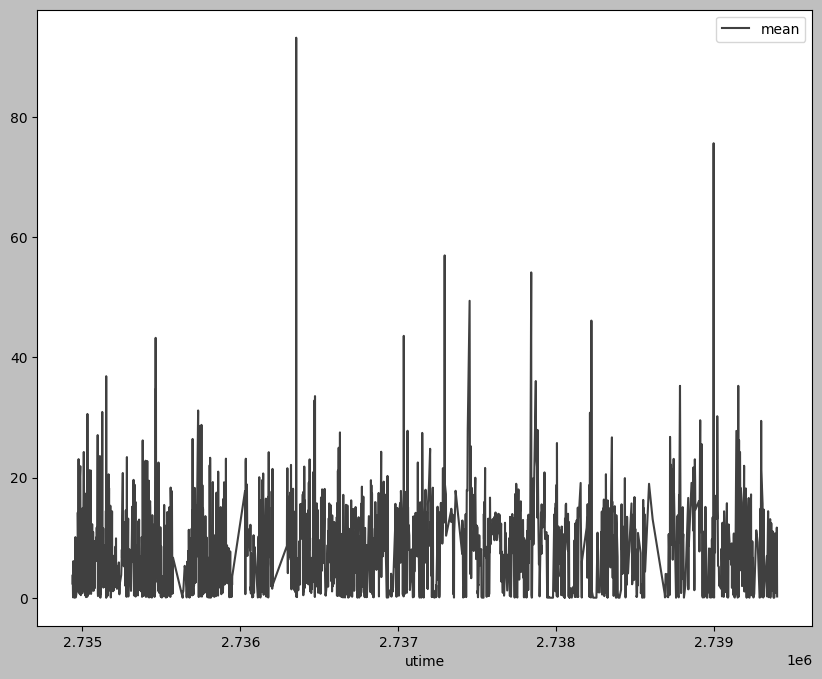

In [178]:
#x_ticks = list(grouped.groups.keys())
#result.plot(xticks=x_ticks, y="mean")

# 각 utime에 평균치를 그래프로 그려보자
result.plot(y="mean", c="0.25")

In [56]:
#do not
cleaned4 = cleaned3['utime', 'calc_act']
cleaned4['act_mean'] = cleaned3.groupby('utime')['calc_act'].mean()
cleaned4['act_max'] = cleaned3.groupby('utime')['calc_act'].max()
cleaned4['act_min'] = cleaned3.groupby('utime')['calc_act'].min()
cleaned4.head(100)

,timestamp,X,Y,Z,p_x,p_timestamp,p_y,p_z,dist,d_time,calc_act,utime,act_mean,act_max,act_min
1,2022-01-01 00:01:42.961,34,87,56,33.0,2022-01-01 00:01:40.363,76.0,56.0,11.045361,2.598,4.251486,2734938.0,NaN,NaN,NaN
2,2022-01-01 00:01:45.562,25,89,47,34.0,2022-01-01 00:01:42.961,87.0,56.0,12.884099,2.601,4.953517,2734938.0,NaN,NaN,NaN
3,2022-01-01 00:01:48.163,11,70,50,25.0,2022-01-01 00:01:45.562,89.0,47.0,23.790755,2.601,9.146772,2734938.0,NaN,NaN,NaN
4,2022-01-01 00:02:08.864,33,72,58,11.0,2022-01-01 00:01:48.163,70.0,50.0,23.494680,20.701,1.134954,2734938.0,NaN,NaN,NaN
5,2022-01-01 00:02:21.765,21,68,58,33.0,2022-01-01 00:02:08.864,72.0,58.0,12.649111,12.901,0.980475,2734938.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2022-01-01 04:36:09.554,-35,443,37,-48.0,2022-01-01 04:36:06.954,443.0,40.0,13.341664,2.600,5.131409,2734965.0,NaN,NaN,NaN
97,2022-01-01 04:36:12.155,-38,440,53,-35.0,2022-01-01 04:36:09.554,443.0,37.0,16.552945,2.601,6.364070,2734965.0,NaN,NaN,NaN
98,2022-01-01 04:36:14.755,-25,450,42,-38.0,2022-01-01 04:36:12.155,440.0,53.0,19.748418,2.600,7.595545,2734965.0,NaN,NaN,NaN
99,2022-01-01 04:36:17.353,-49,456,26,-25.0,2022-01-01 04:36:14.755,450.0,42.0,29.461840,2.598,11.340200,2734965.0,NaN,NaN,NaN


In [25]:
cleaned

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,utime
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,2734938
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,2734938
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,2734938
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,2734938
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,2734938
...,...,...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100,3.167744,2739398
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202,0.084076,2739398
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700,1.055070,2739398
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043,0.030831,2739399


In [122]:
# 일별 활동지수
# 86400 = 60 sec x 60 min x 24 hour
def make_day_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 86400)
    
day = cleaned.copy()
day['utime'] =cleaned[["timestamp"]].apply(make_day_unixtime, axis=1)
day.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,utime
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,18992
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,18992
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,18992
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,18992
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,18992


In [123]:
# unxtime으로 그룹핑하기
grouped = day.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)

,mean,min,max
utime,,,
18992,9.598048,0.0,180.000000
18993,8.604871,0.0,196.279481
18994,6.518747,0.0,458.448986
18995,8.260939,0.0,206.975693
18996,8.240758,0.0,221.561886


In [124]:
#인덱스 utime을 열로 변환
result = result.reset_index()
result.head(5)

,utime,mean,min,max
0,18992,9.598048,0.0,180.000000
1,18993,8.604871,0.0,196.279481
2,18994,6.518747,0.0,458.448986
3,18995,8.260939,0.0,206.975693
4,18996,8.240758,0.0,221.561886


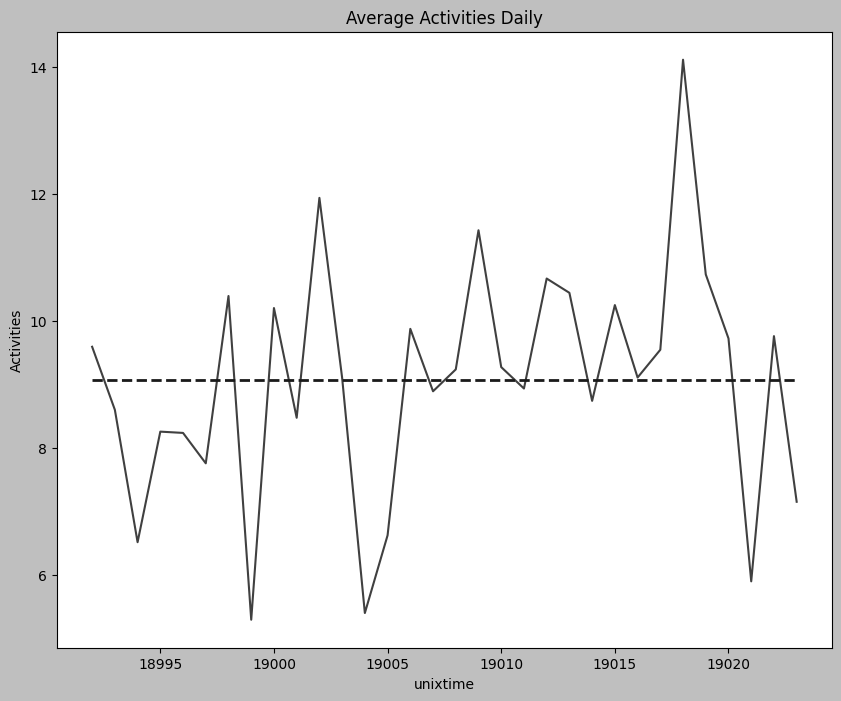

In [125]:
from matplotlib.ticker import MaxNLocator


x_ticks = list(grouped.groups.keys())
plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("unixtime")
plt.ylabel("Activities")

plt.show()


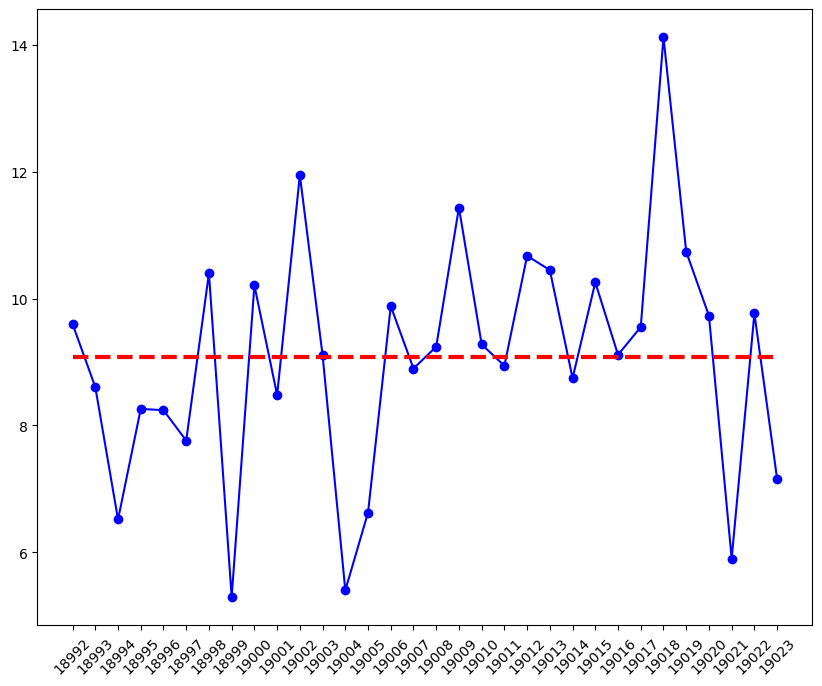

In [38]:



x_ticks = list(grouped.groups.keys())
#bx = result.plot(xticks=x_ticks, y="mean")
plt.plot(x_ticks, result['mean'], 'bo-')
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='red', linestyle='--', linewidth=3)


#import matplotlib.pyplot as plt
#bx.fill_between(x_ticks, result['min'], result['max'], color='gray', alpha=0.2)



#import matplotlib.ticker as ticker
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.xticks(x_ticks, rotation=45)
plt.show()

In [179]:
# 시간별 활동지수
# 3600 = 60 sec x 60 min
def make_hour_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 3600)
    
hour = cleaned.copy()
hour['utime'] =cleaned[["timestamp"]].apply(make_hour_unixtime, axis=1)
hour.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,455823,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,455823,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,455823,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,455823,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,455823,2734938,0.980475


In [180]:
# unixtime으로 그룹핑하기
grouped = hour.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)

,mean,min,max
utime,,,
455823,3.025915,0.011198,14.338601
455824,3.948859,0.013024,7.813303
455825,1.965045,0.006504,9.646105
455826,9.173303,0.065512,67.447458
455827,6.503876,0.000000,28.781980


In [181]:
#인덱스  utime을 열로 변환
result = result.reset_index()
result.head(5)

,utime,mean,min,max
0,455823,3.025915,0.011198,14.338601
1,455824,3.948859,0.013024,7.813303
2,455825,1.965045,0.006504,9.646105
3,455826,9.173303,0.065512,67.447458
4,455827,6.503876,0.000000,28.781980


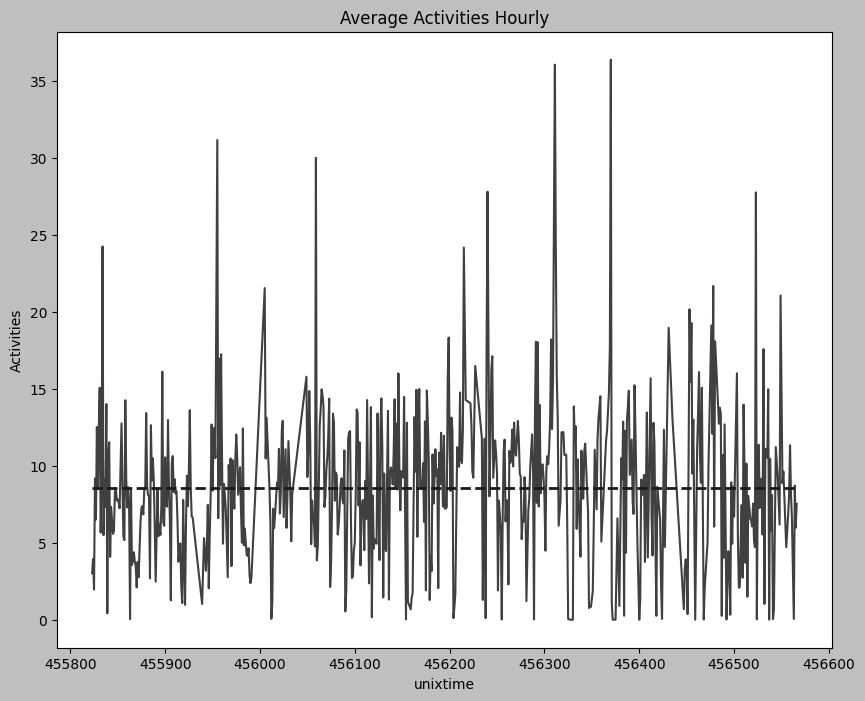

In [182]:
from matplotlib.ticker import MaxNLocator


# x_ticks = list(grouped.groups.keys())
# bx = result.plot(xticks=x_ticks, y="mean")

# plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='red', linestyle='--', linewidth=3)


# plt.xticks(x_ticks, rotation=45)

# bx.xaxis.set_major_locator(MaxNLocator(30)) 

# x_ticks = list(grouped.groups.keys())
plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)


plt.title("Average Activities Hourly")
plt.xlabel("unixtime")
plt.ylabel("Activities")

# plt.legend()
plt.show()



In [184]:
# 일별 활동지수
# 86400 = 60 sec x 60 min x 24 hour
def make_day_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 86400)
    
day = cleaned.copy()
day['utime'] =cleaned[["timestamp"]].apply(make_day_unixtime, axis=1)
day.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,18992,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,18992,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,18992,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,18992,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,18992,2734938,0.980475


In [185]:
# utime으로 그룹핑하기
grouped = day.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)


,mean,min,max
utime,,,
18992,9.598048,0.0,180.000000
18993,8.604871,0.0,196.279481
18994,6.518747,0.0,458.448986
18995,8.260939,0.0,206.975693
18996,8.240758,0.0,221.561886


In [186]:
#인덱스 utime을 열로 변환
result = result.reset_index()
result.head(5)


,utime,mean,min,max
0,18992,9.598048,0.0,180.000000
1,18993,8.604871,0.0,196.279481
2,18994,6.518747,0.0,458.448986
3,18995,8.260939,0.0,206.975693
4,18996,8.240758,0.0,221.561886


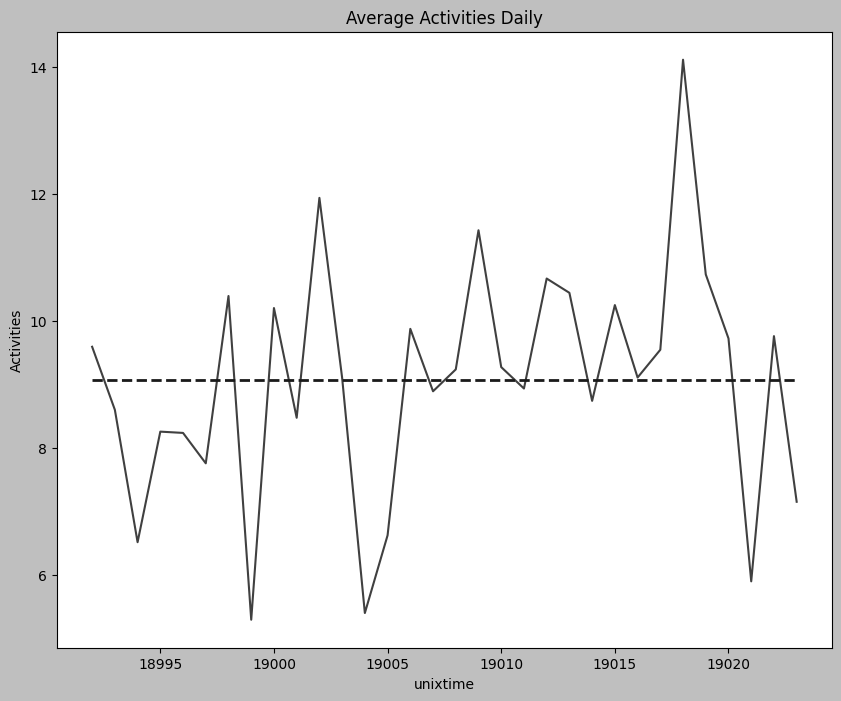

In [187]:
from matplotlib.ticker import MaxNLocator

plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("unixtime")
plt.ylabel("Activities")

plt.show()


In [188]:
newtenmin

NameError: name 'newtenmin' is not defined